In [3]:
import numpy as np
import sympy as sy
sy.init_printing(use_unicode=True)

In [4]:
def g(b):
    return 1./np.sqrt(1-b**2)

cl = 299792458

In [7]:
g(0.77)

## Gyroradius

In [10]:
b=0.77
v=b*cl #m/s
B0 = 1 # Tesla
m = 105.6583755e6 # Muon mass in GeV/c**2
evc2_to_kg = 1.78266192e-36
m_kg = m * evc2_to_kg #muon mass Kg
ec = 1.602176634e-19 # Coulomb
q = ec
e0 = 8.85418781281e-12
hl_pt = 2.1969811e-6
ev_to_joule = 1.602176634e-19
Er = -0.64e6 #  [Volt/meter] 

gyrorad = g(b)*m_kg*v/(q*B0) # Meters
gyrorad_el = g(b)*m_kg*v**2/(q*(v*B0+Er))
gyrorad_el

## Velocita' da energia cinetica

In [6]:
Ek, v, c, m = sy.symbols('Ek, v, c, m', real=True)
gg = 1/sy.sqrt(1-v**2/c**2)


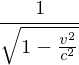

In [78]:
gg

In [79]:
print(sy.simplify(sy.solveset(Ek-gg*m*c**2,v)))

{-c*sqrt(Ek**2 - c**4*m**2)/Ek, c*sqrt(Ek**2 - c**4*m**2)/Ek} \ {-c, c}


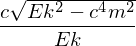

In [80]:
v_ek = c*sy.sqrt(Ek**2 - c**4*m**2)/Ek
v_ek

In [81]:
v_ek.subs([(Ek, 2), (c, cl)])

## Gyroradius con E

In [7]:
r_g, E0, qq, B0, ggg = sy.symbols('r_g, E0, qq, B0, ggg', real=True)

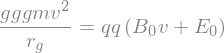

In [9]:
gyroeq = sy.Eq(ggg*m*v**2/r_g,qq*(E0+v*B0))
gyroeq

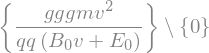

In [10]:
sol=sy.simplify(sy.solveset(gyroeq,r_g))
sol

In [87]:
sol.subs([(qq,q),(c,cl),(B0,1),(E0,0),(v,0.77*cl),(m,m_kg),(ggg,1.57)])

In [86]:
q

## Inverse of exponential cumulative distribution

In [12]:
b,x,perc = sy.symbols('b, x, perc', real=True)

In [13]:
l = 1/b
sol = sy.solveset(1-sy.exp(-l*x)-perc,x,domain=sy.S.Reals)
sol 

In [14]:
-x*np.log(0.03)

## Bremsstrahlung

In [34]:
qq, a, ee0, cc,gg = sy.symbols('q, a, ee0, c,gg', real=True)

In [35]:
sy.pi

In [36]:
P=qq**2*a**2*gg**4/(6*sy.pi*ee0*cc**3)

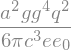

In [37]:
P

In [43]:
pn = P.subs([(qq,q),(c,cl),(gg,g(0.77)),(a,1.25e+17),(ee0,e0)]).evalf()
pn

In [47]:
Eloss_up = pn*hl_pt*g(0.77) # Energy loss upper bound = Radiated power x muon lifetime (approx no change in speed)
Eloss_up

In [66]:
Etot = m_kg*(g(b)-1)*cl**2
Etot